# Clean and analyze employee exit survey

In this guided project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

The main goal of this project is to answers the following questions:

* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? 
* What about employees who have been at the job longer?

As you can see at the end, we have an answer, but with a twist: maybe you need to look which people are hanging around and you have a better picture of the main reasons of the dissatisfaction.

## 1. Opening documents 

Once we have the datasets, we are going to open the documents. The libraries that we're going to use is `pandas` and `numpy`.

In [1]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

## 2. Detecting missing values

In this part we will see the distribution of the data and the missing values that the data have. 

Because we are working with a big dataset, any tool that help us to visualize quickly all the data will be helpful. For this purpose we are using the following libraries:

+ [**`missingno`**](https://github.com/ResidentMario/missingno): a helpful library to visualize missing values, have three functions that we use in the analysis, `matrix` allow us to visualize the distribution of the missing values, `bar` allow us to visualize the total non-null data, and `heatmap`help us to see correlations in the missing data, so we can know how missing values are associated.  

### 2.1. Dete Survey Missing Values

First, we need to review the total number of columns, ´info´ and ´shape´ would help us to visualize.

In [2]:
dete_survey.info()
dete_survey.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

(822, 56)

#### 2.1.1. `missingno` toolset

Missingno small toolset is helpful to quickly visualize the misisng values. We are going to use first the matrix option.

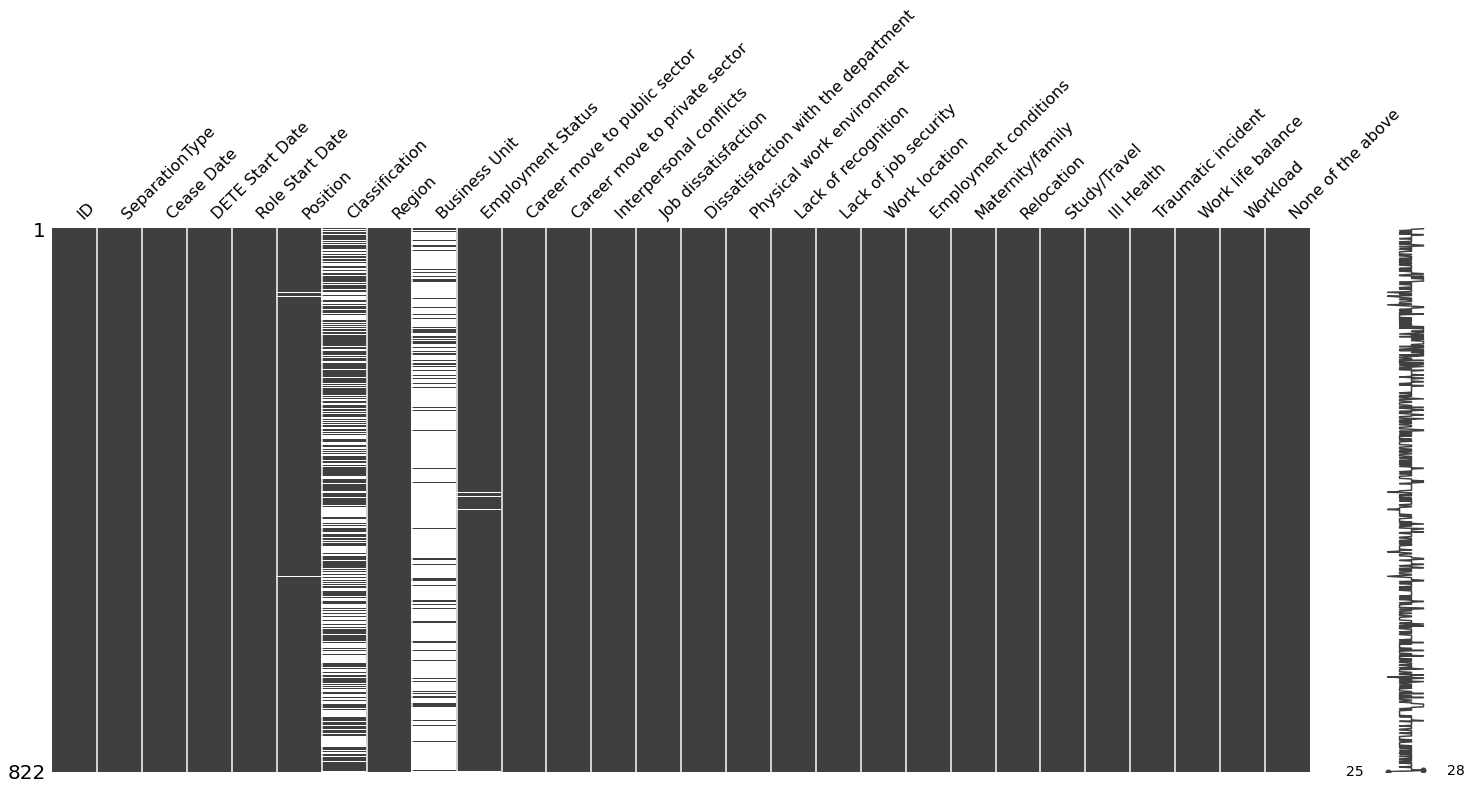

In [3]:
import missingno as msno
%matplotlib inline
msno.matrix(dete_survey.iloc[:, 0:28])

***
We can make some immediate interpretations about our  Dete Survey dataframe from columns 1 to 27:

+ The columns from _Career move to public sector_ to the _None of the above_ have few to no missing values.
+ The columns *Classification* and *Business Unit* have several missing values.
***

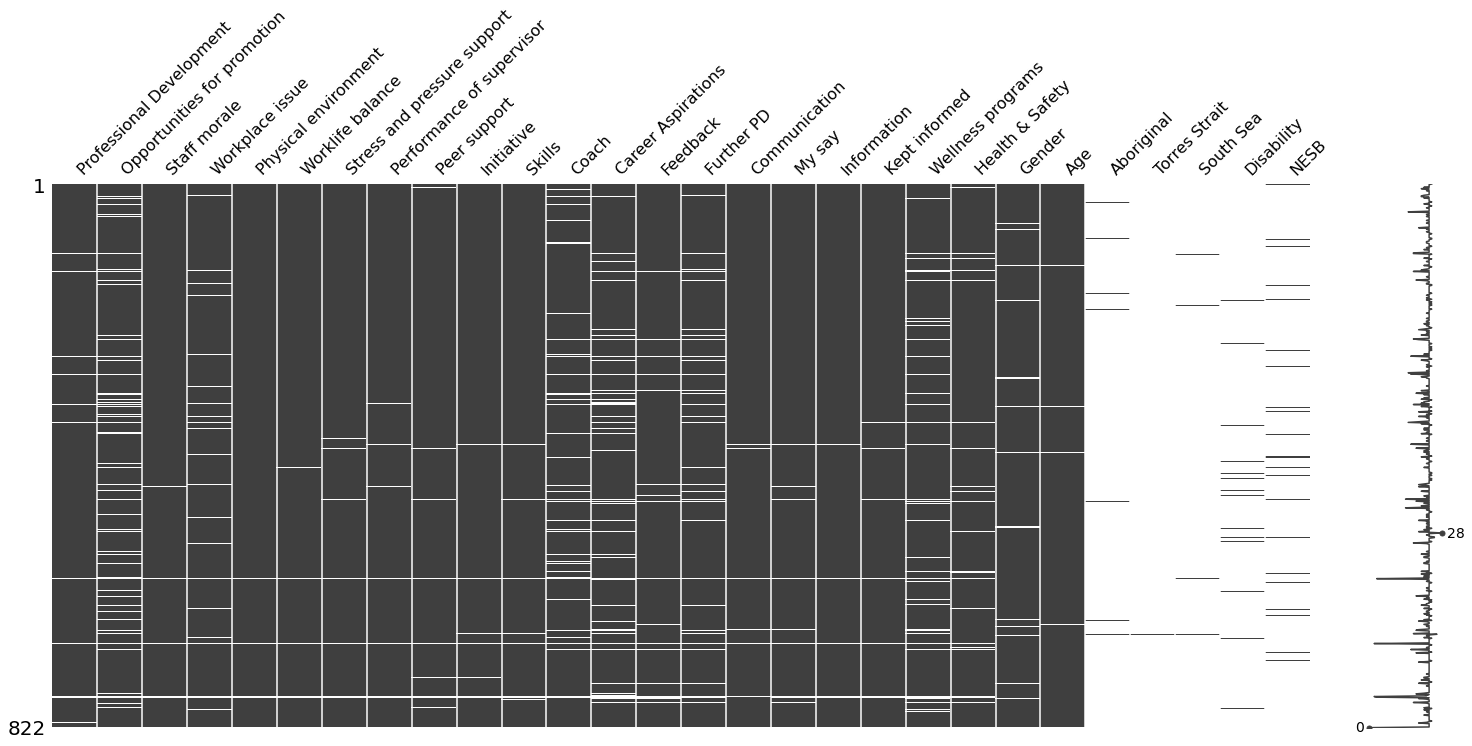

In [4]:
%matplotlib inline
msno.matrix(dete_survey.iloc[:, 28:57])

***
We can make some immediate interpretations about our  Dete Survey dataframe from columns 27 to 54:

+ The las columns have a lot of missing values.
+ All the columns have some missing values.
***

The heatmap will help us to see correlations between the missing data of different columns, in this case I'm not completely sure if my interpretation is totally speculative, but here are some observations:

* The *staff morale* and *physical environment* columns have a high correlation in their missing values, so we can say that both columns have a high relation with another information of the survey, is not clear for me why, maybe because both are related with how the people feel with their job.

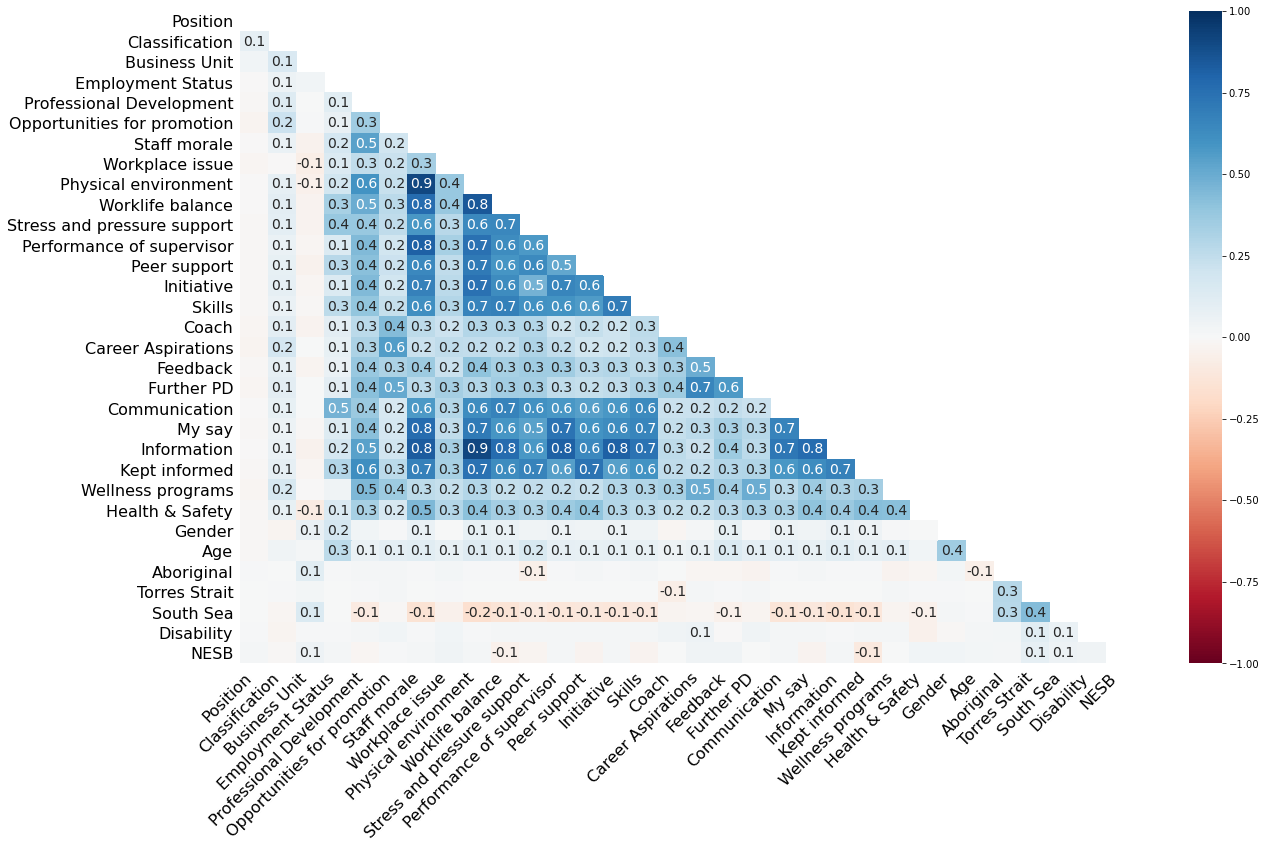

In [5]:
msno.heatmap(dete_survey)

The bar plot of missing values is extremely helpful to see the total missing values, and also we can quickly relate the missing info with the columns names. We could conclude:

* *Businnes Unit*, *Classification*, *aboriginal*, *Torres Strait*, *South Sea*, *Disability* and *NESB* columns have the most missing values.

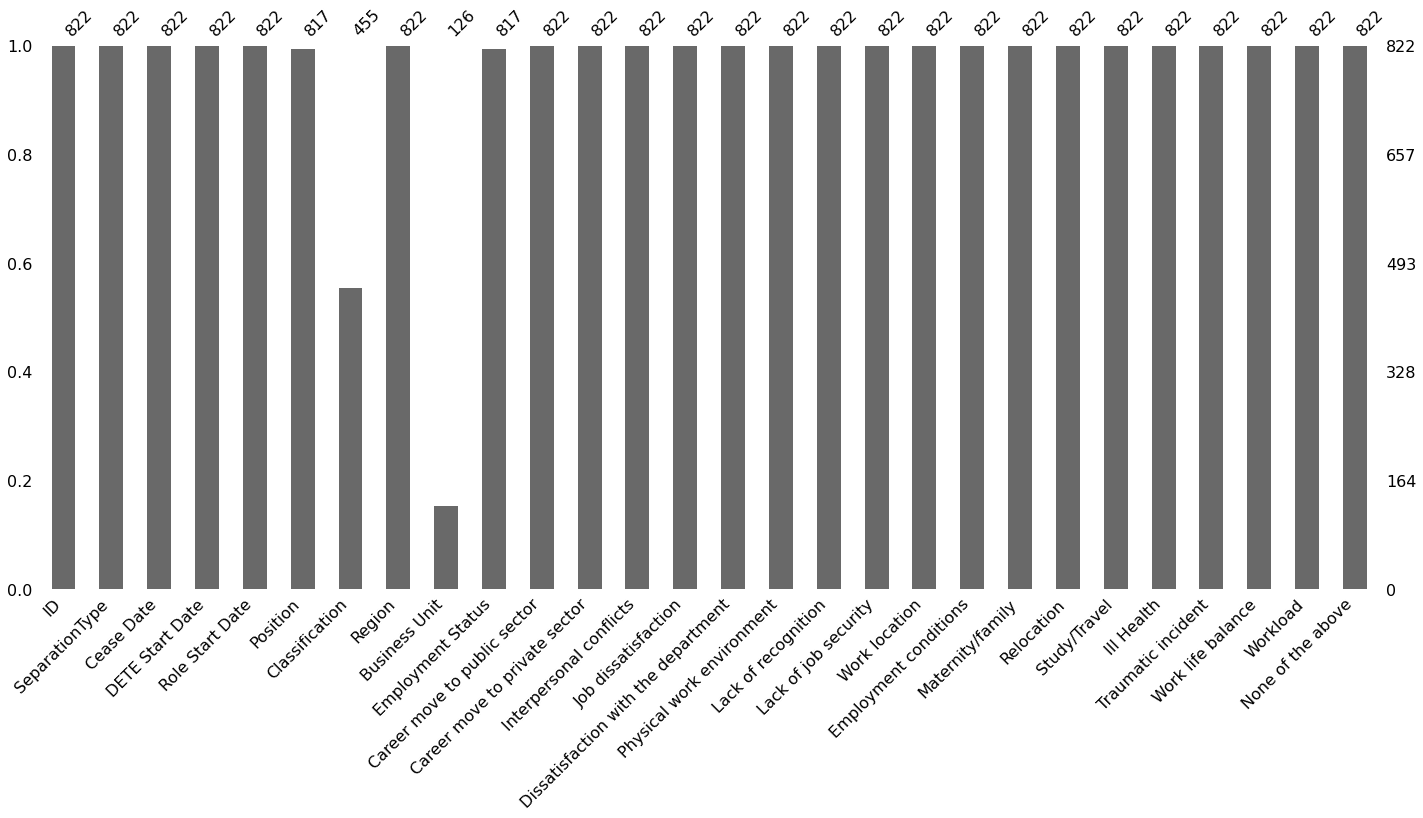

In [6]:
msno.bar(dete_survey.iloc[:, 0:28])

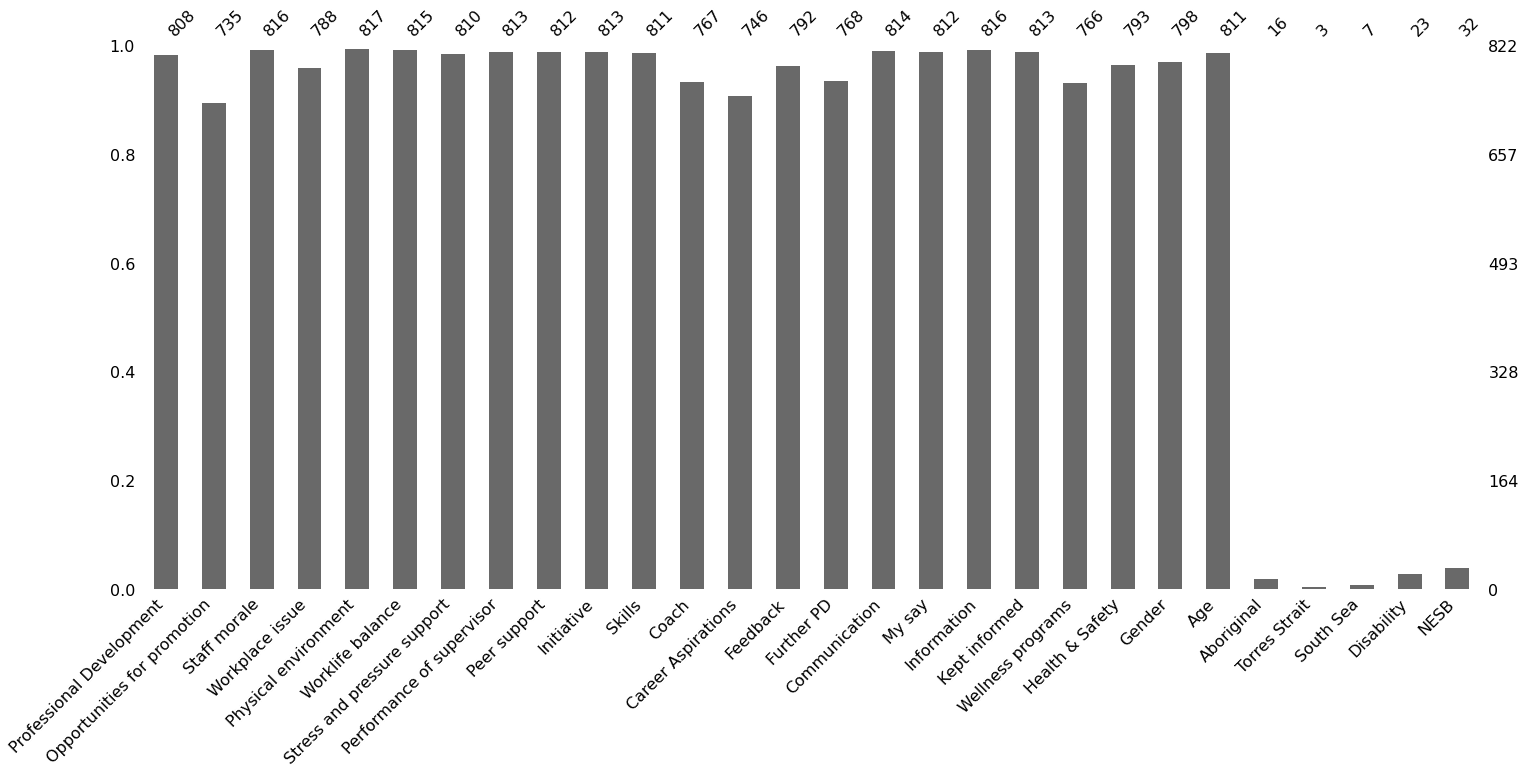

In [7]:
msno.bar(dete_survey.iloc[:, 28:56])

Interesting!

So we need to know more about this columns with missing values, so we can take a decision regarding the relevance of the info for our analysis.

* Classification indicates some type of functions, that maybe related to teachers more than administrative work.
* Business unit may indicate the departments where the people work.

In [8]:
dete_survey['Classification'].value_counts(dropna=False)

NaN                  367
Primary              161
Secondary            124
A01-A04               66
AO5-AO7               46
Special Education     33
AO8 and Above         14
PO1-PO4                8
Middle                 3
Name: Classification, dtype: int64

In [9]:
dete_survey['Business Unit'].value_counts(dropna=False)

NaN                                           696
Education Queensland                           54
Information and Technologies                   26
Training and Tertiary Education Queensland     12
Other                                          11
Human Resources                                 6
Corporate Strategy and Peformance               5
Early Childhood Education and Care              3
Policy, Research, Legislation                   2
Infrastructure                                  2
Indigenous Education and Training Futures       1
Corporate Procurement                           1
Finance                                         1
Pacific Pines SHS                               1
Calliope State School                           1
Name: Business Unit, dtype: int64

In [10]:
dete_survey['Aboriginal'].value_counts(dropna=False)

NaN    806
Yes     16
Name: Aboriginal, dtype: int64

#### 2.1.2. Understanding the last missing columns.

Some of the columns are exclusive of the Australian government classification for special groups in their population:

**Aboriginal and Torres Strait Islander** peoples are the First Australians and Traditional Owners of the GBR. Seventy Traditional Owner clan groups, including Aboriginal and Torres Strait Islanders, are custodians of sea country that covers the GBR. Traditional Owners have significant and enduring social, cultural, economic, and spiritual connections to the GBR region. [Link](https://www.sciencedirect.com/topics/earth-and-planetary-sciences/torres-strait).

**Australian South Sea Islanders** – Port Jackson (ASSIPJ) recognise the traditional owners of the lands of which we operate from known as the Gadigal People who are one of twenty-nine clans of the Eora Nation in Sydney New South Wales, Australia. [Link](http://www.assipj.com.au/)

Australia is one of the most culturally diverse and prosperous societies in the world, and such heterogeneity or pluralism has both advantages and challenges. The Australian government must provide support to and for the integration of migrants, especially among those with a **non-English-speaking background** (NESB). [Link](https://researchdirect.westernsydney.edu.au/islandora/object/uws%3A19413)

In [11]:
dete_survey['Torres Strait'].value_counts(dropna=False)

NaN    819
Yes      3
Name: Torres Strait, dtype: int64

In [12]:
dete_survey['Disability'].value_counts(dropna=False)

NaN    799
Yes     23
Name: Disability, dtype: int64

In [13]:
dete_survey['NESB'].value_counts(dropna=False)

NaN    790
Yes     32
Name: NESB, dtype: int64

### 2.2. Tafe Survey Missing Values

We are going to use the same approach that we take with the DETE Survey, using first `info` and `shape`to visualize the missing data as list, next use `missingno` toolset.

In [14]:
tafe_survey.info()
tafe_survey.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

(702, 72)

In [15]:
#We need to remove parte of the names of the survey because the names are too long and are difficult to visualize
columns = tafe_survey.columns.str.split('.').str[0].tolist()
tafe_simple = tafe_survey.copy()
tafe_simple.columns = columns

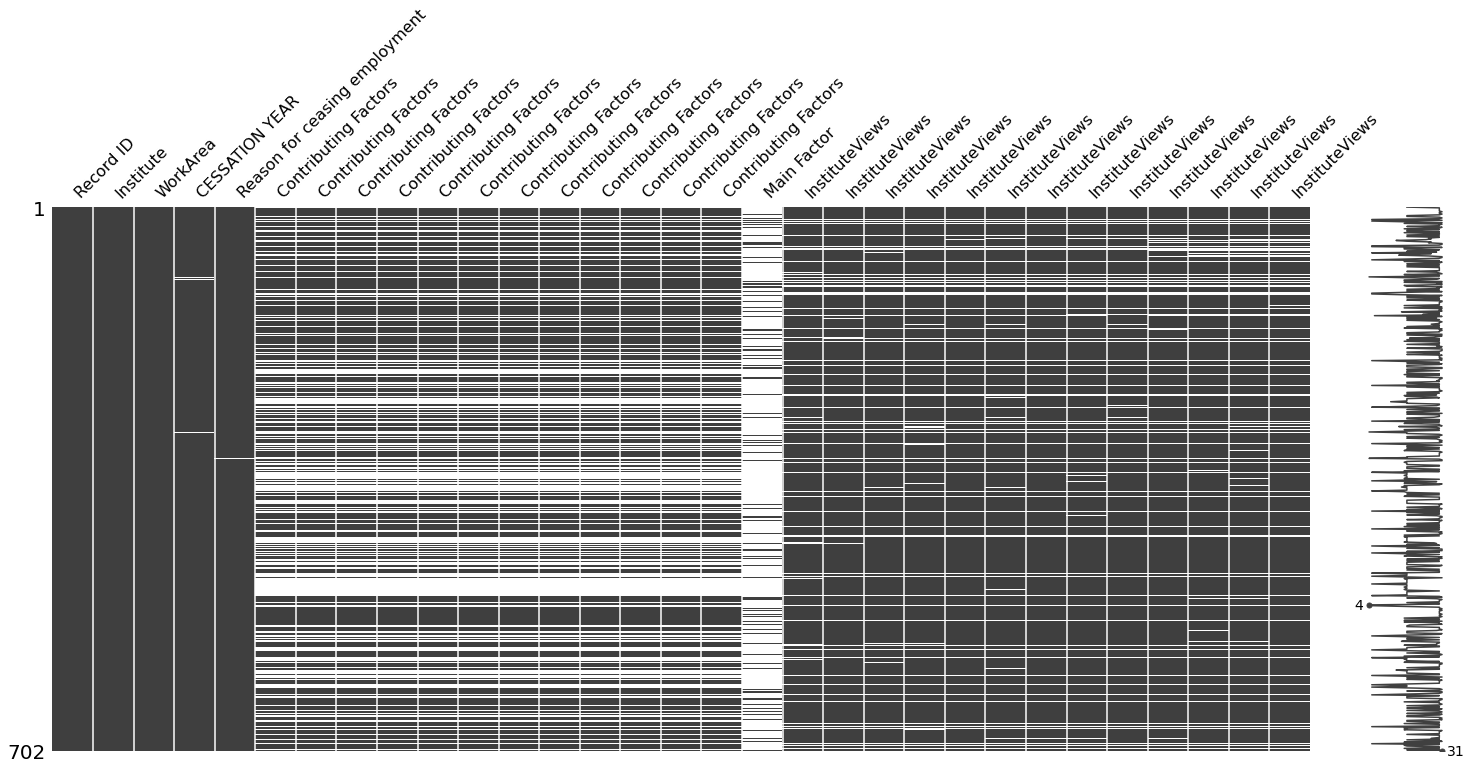

In [16]:
msno.matrix(tafe_simple.iloc[:, 0:31])

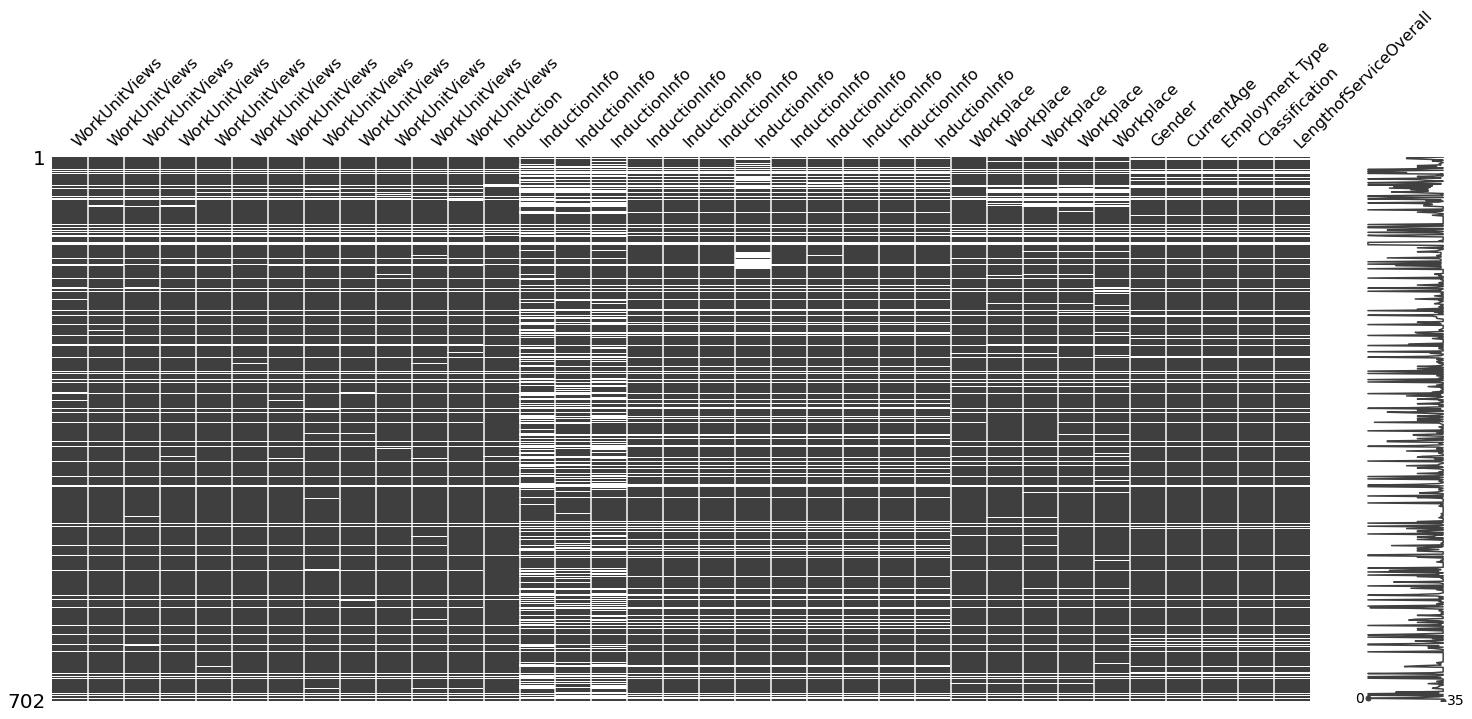

In [17]:
msno.matrix(tafe_simple.iloc[:, 36:71])

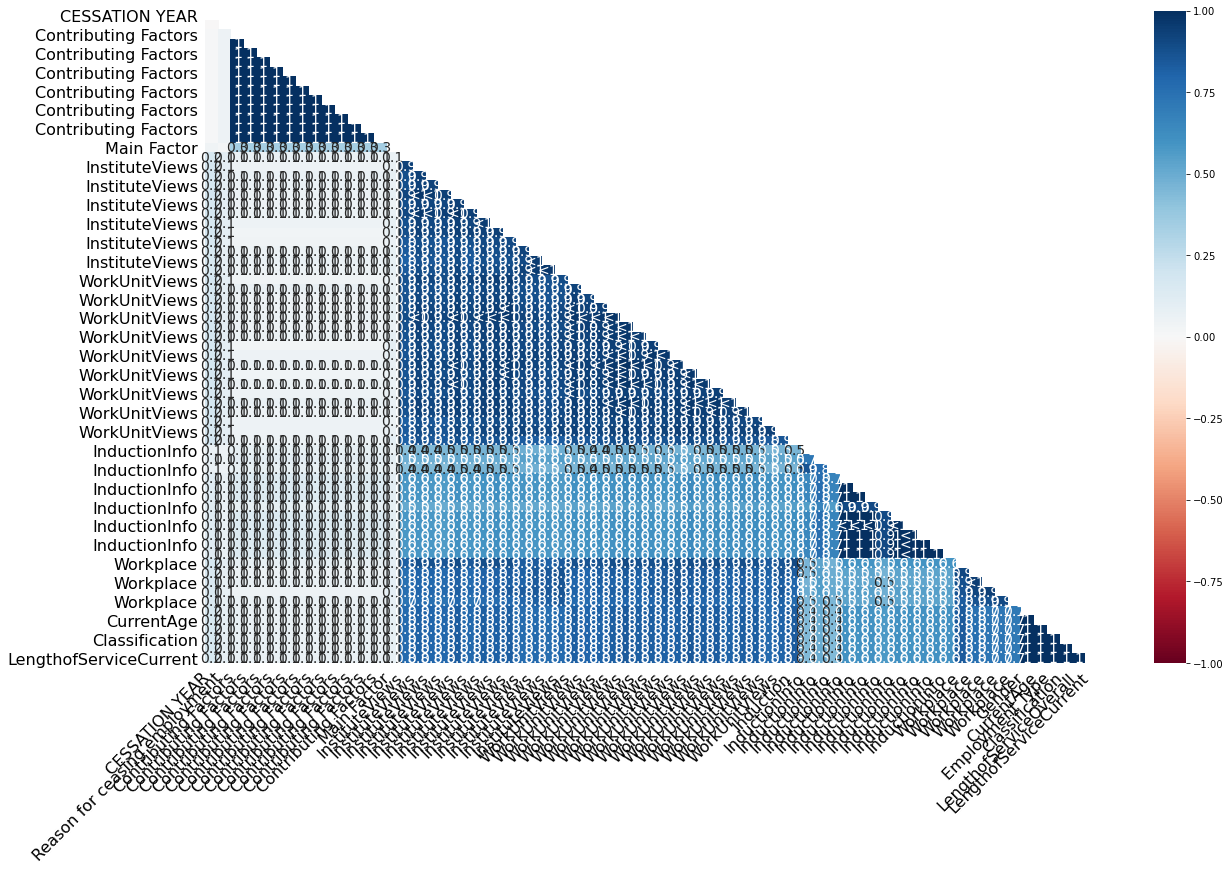

In [18]:
msno.heatmap(tafe_simple)

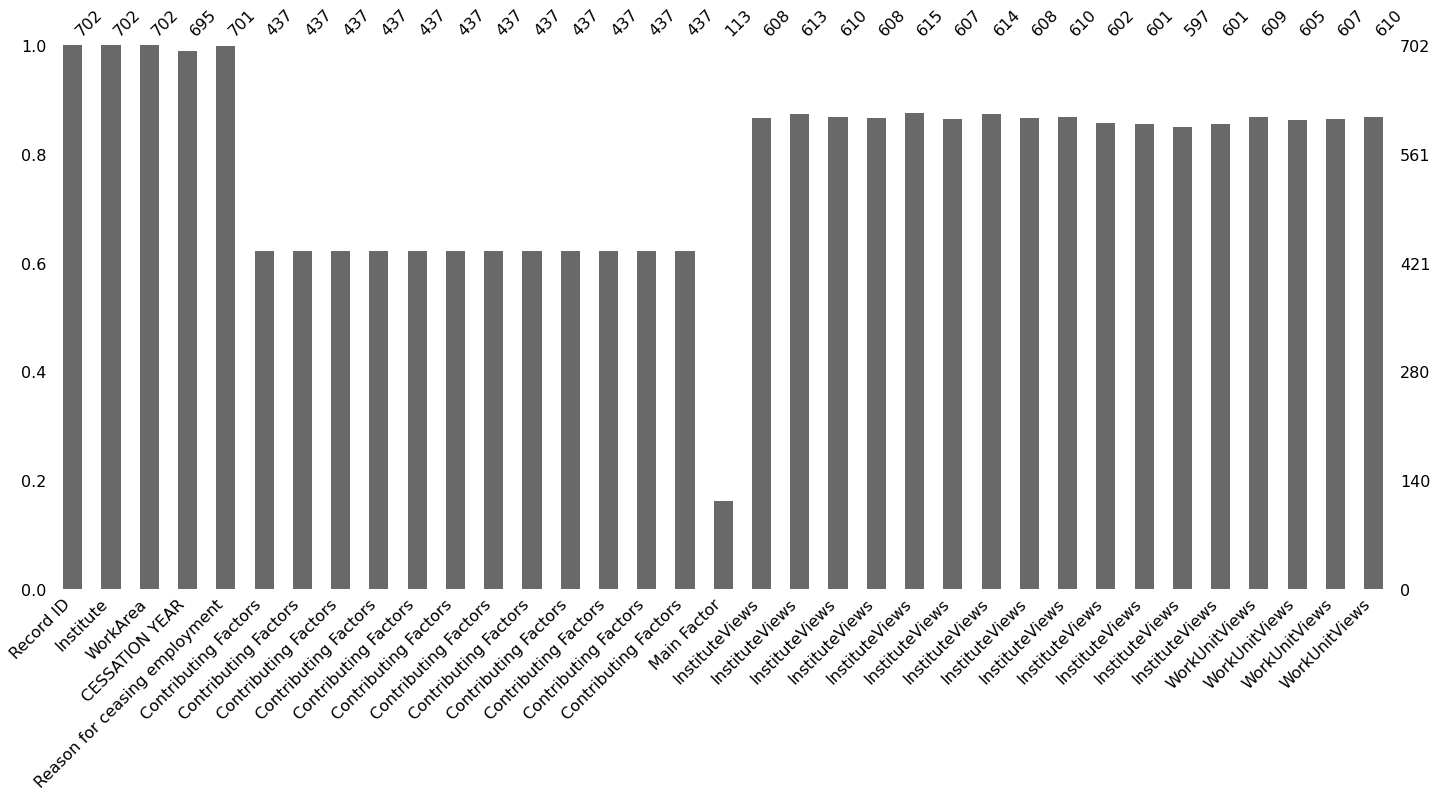

In [19]:
msno.bar(tafe_simple.iloc[:, 0:35])

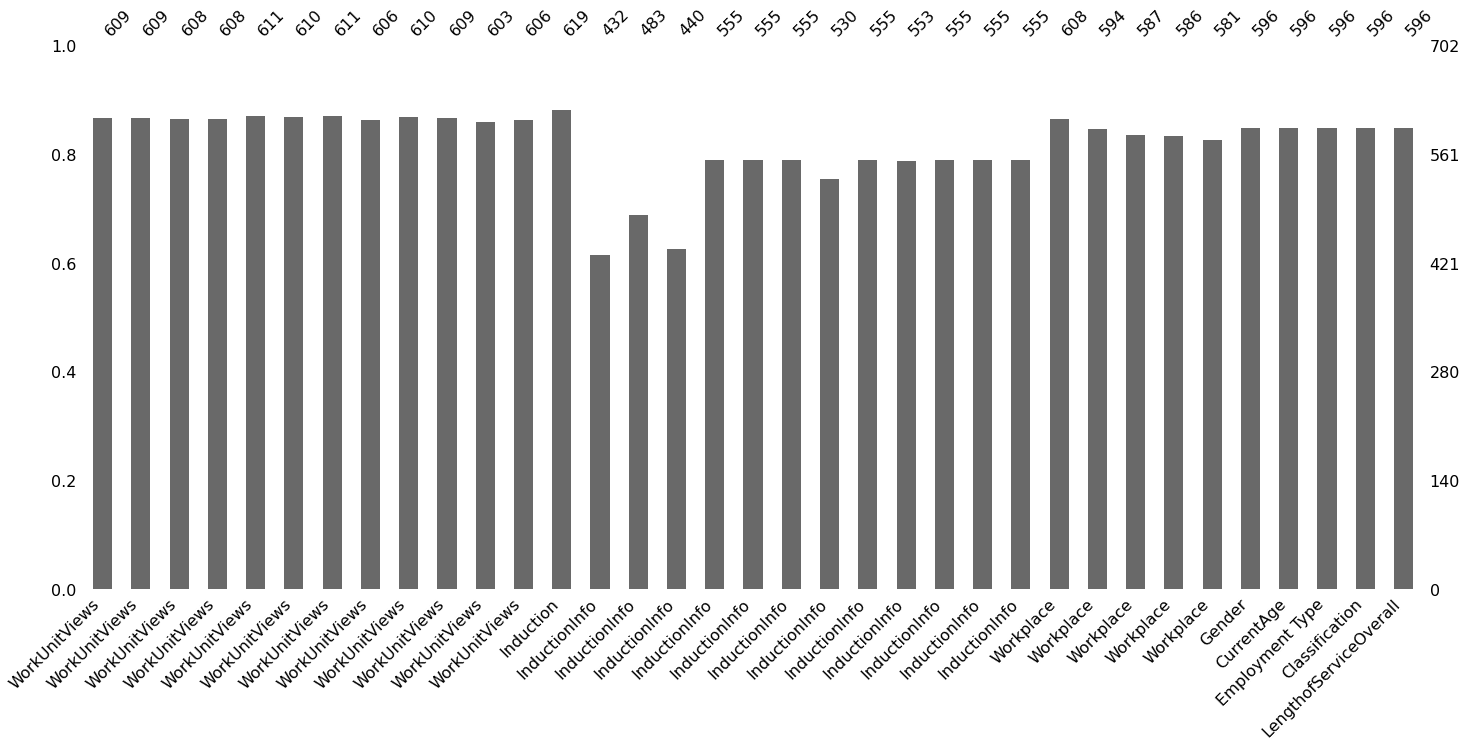

In [20]:
msno.bar(tafe_simple.iloc[:, 36:71])

Following the analysis using the tool set, we can conclude:

* The *Main Factor. Which of these was the main factor for leaving?*, *'InductionInfo. Topic:Did you undertake a Corporate Induction?'* and *'Contributing Factors. Career Move - Public Sector '* columns have the most missing values, so we are going to explore in detail the values.
* Most of the columns have missing data, maybe because was an open survey, some questions have not answer.

In [21]:
tafe_survey['Main Factor. Which of these was the main factor for leaving?'].value_counts(dropna=False)

NaN                                         589
Dissatisfaction with %[Institute]Q25LBL%     23
Job Dissatisfaction                          22
Other                                        18
Career Move - Private Sector                 16
Interpersonal Conflict                        9
Career Move - Public Sector                   8
Maternity/Family                              6
Career Move - Self-employment                 4
Ill Health                                    3
Study                                         2
Travel                                        2
Name: Main Factor. Which of these was the main factor for leaving?, dtype: int64

In [22]:
tafe_survey['InductionInfo. Topic:Did you undertake a Corporate Induction?'].value_counts(dropna=False)

NaN    270
Yes    232
No     200
Name: InductionInfo. Topic:Did you undertake a Corporate Induction?, dtype: int64

In [23]:
tafe_survey['Contributing Factors. Career Move - Public Sector '].value_counts(dropna=False)

-                              375
NaN                            265
Career Move - Public Sector     62
Name: Contributing Factors. Career Move - Public Sector , dtype: int64

## 3. Cleaning up columns and changing missing values

Now, the dirty work: drop columns and change missing data.

There is not clear criteria for this part, because is the first time that I'm doing this in python I'm following the instructions of the project. Sure, my future self will read this and will said "what a missing opportunity to apply many interesting statistics tricks", so well, future self, surprise me.

So, following the instructions, these are the steps of the following activity:

1. Convert "Non Stated" to NaN.
2. Drop columns no relevant to the goal of the project. For example the survey columns of DETE and TAFE could be dropped, because are not directly related to the dissatisfaction analysis.

Let's go.

### 3.1. Changing "Non Stated" to Nan

To change the values "Non Stated" to `NaN`, we need to open again our CSV document, but this time we are going to use the ´na_values´ option and put the value that we wan to read as `NaN`.

In [24]:
# Here we open again, this time using the na_value option
dete_survey = pd.read_csv('dete_survey.csv', na_values = "Not Stated")
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


### 3.2. Date Survey: dropping columns

Now, the easiest of the easiest: drop columns.

We are going to us the `drop` method, indicating the location of the columns with the number and `axis=1` to drop all the column.

In [25]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
dete_survey_updated.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Now we can visualize the result again using the `missingno` tool set, using bar option.

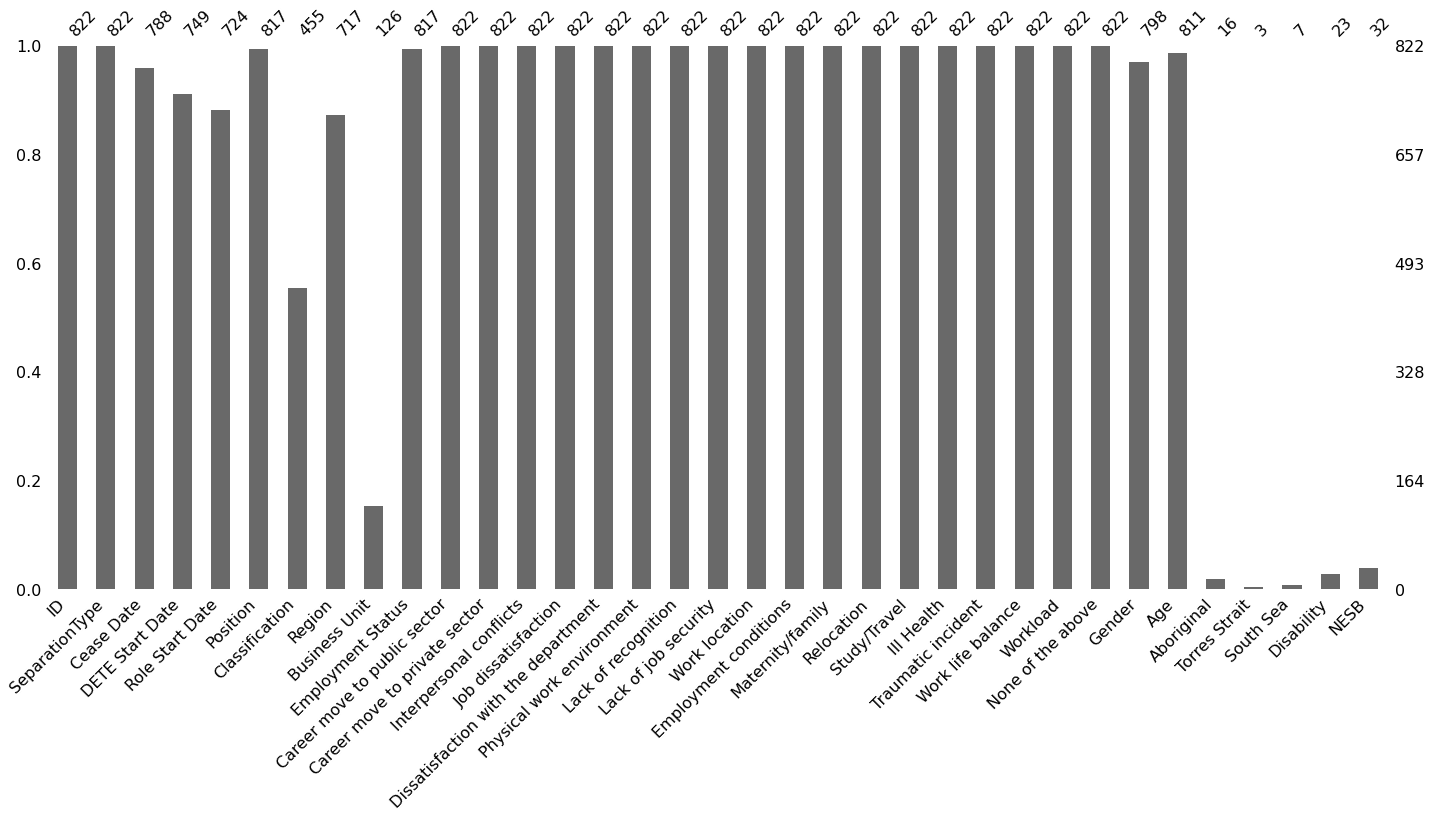

In [26]:
msno.bar(dete_survey_updated)

### 3.3. Tafe Survey: dropping columns

With the TAFE survey we follow the same steps, in this case we remove the columns to 17 to 66, I don't know why. I think the information with some mathematical tools could be powerful to analyze, but for the purpose of the project we don't need to use the info (note: future me please check that)

In [27]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
tafe_survey_updated.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


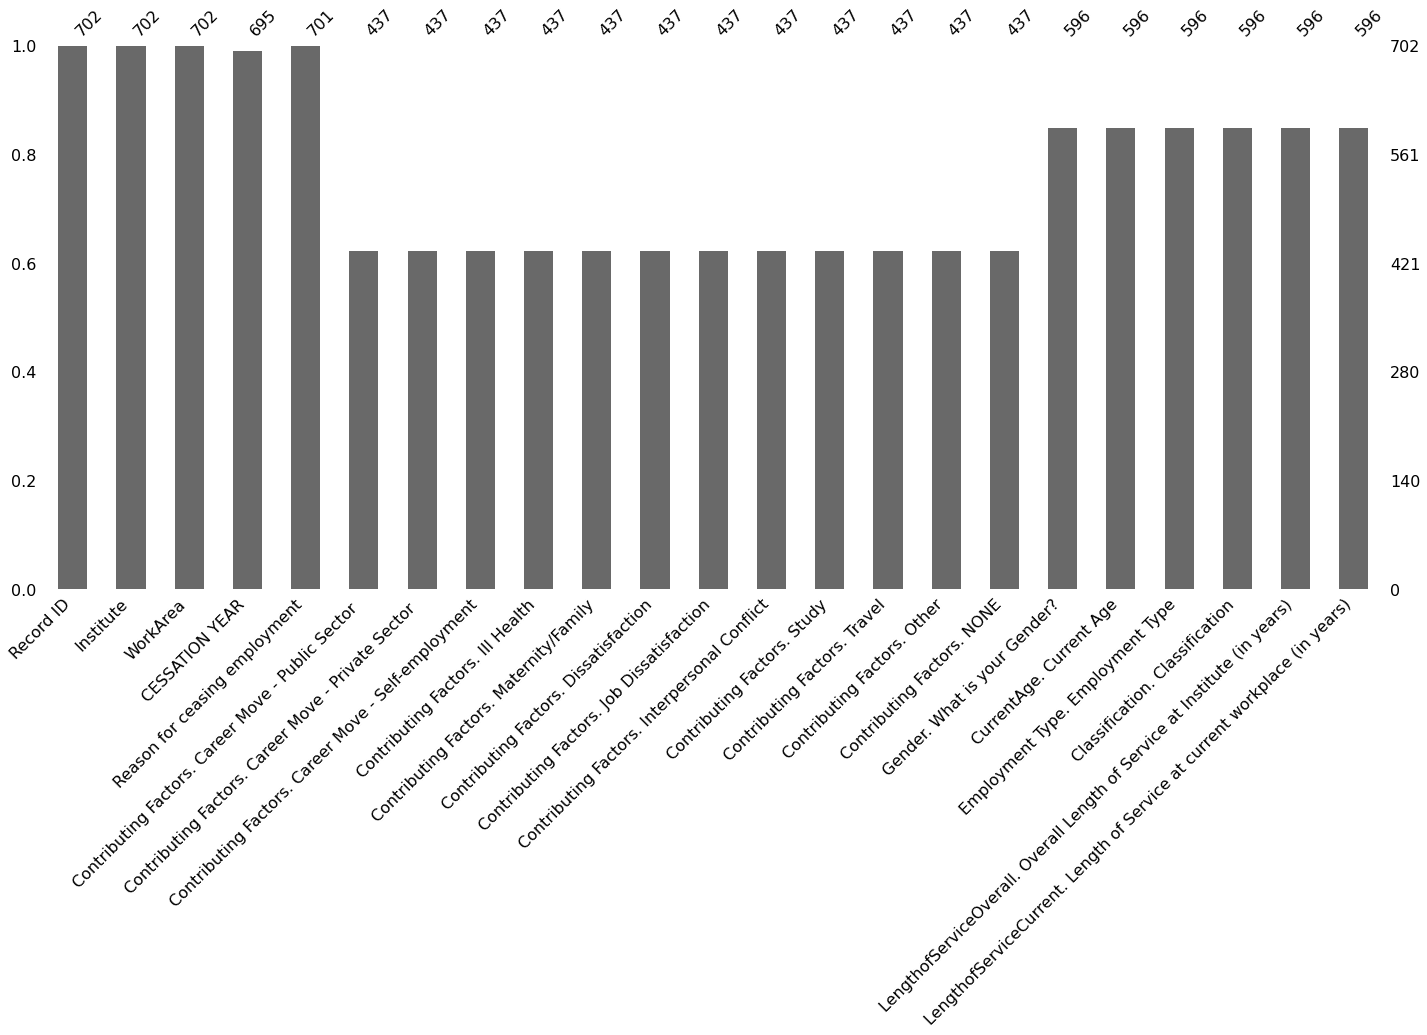

In [28]:
msno.bar(tafe_survey_updated)

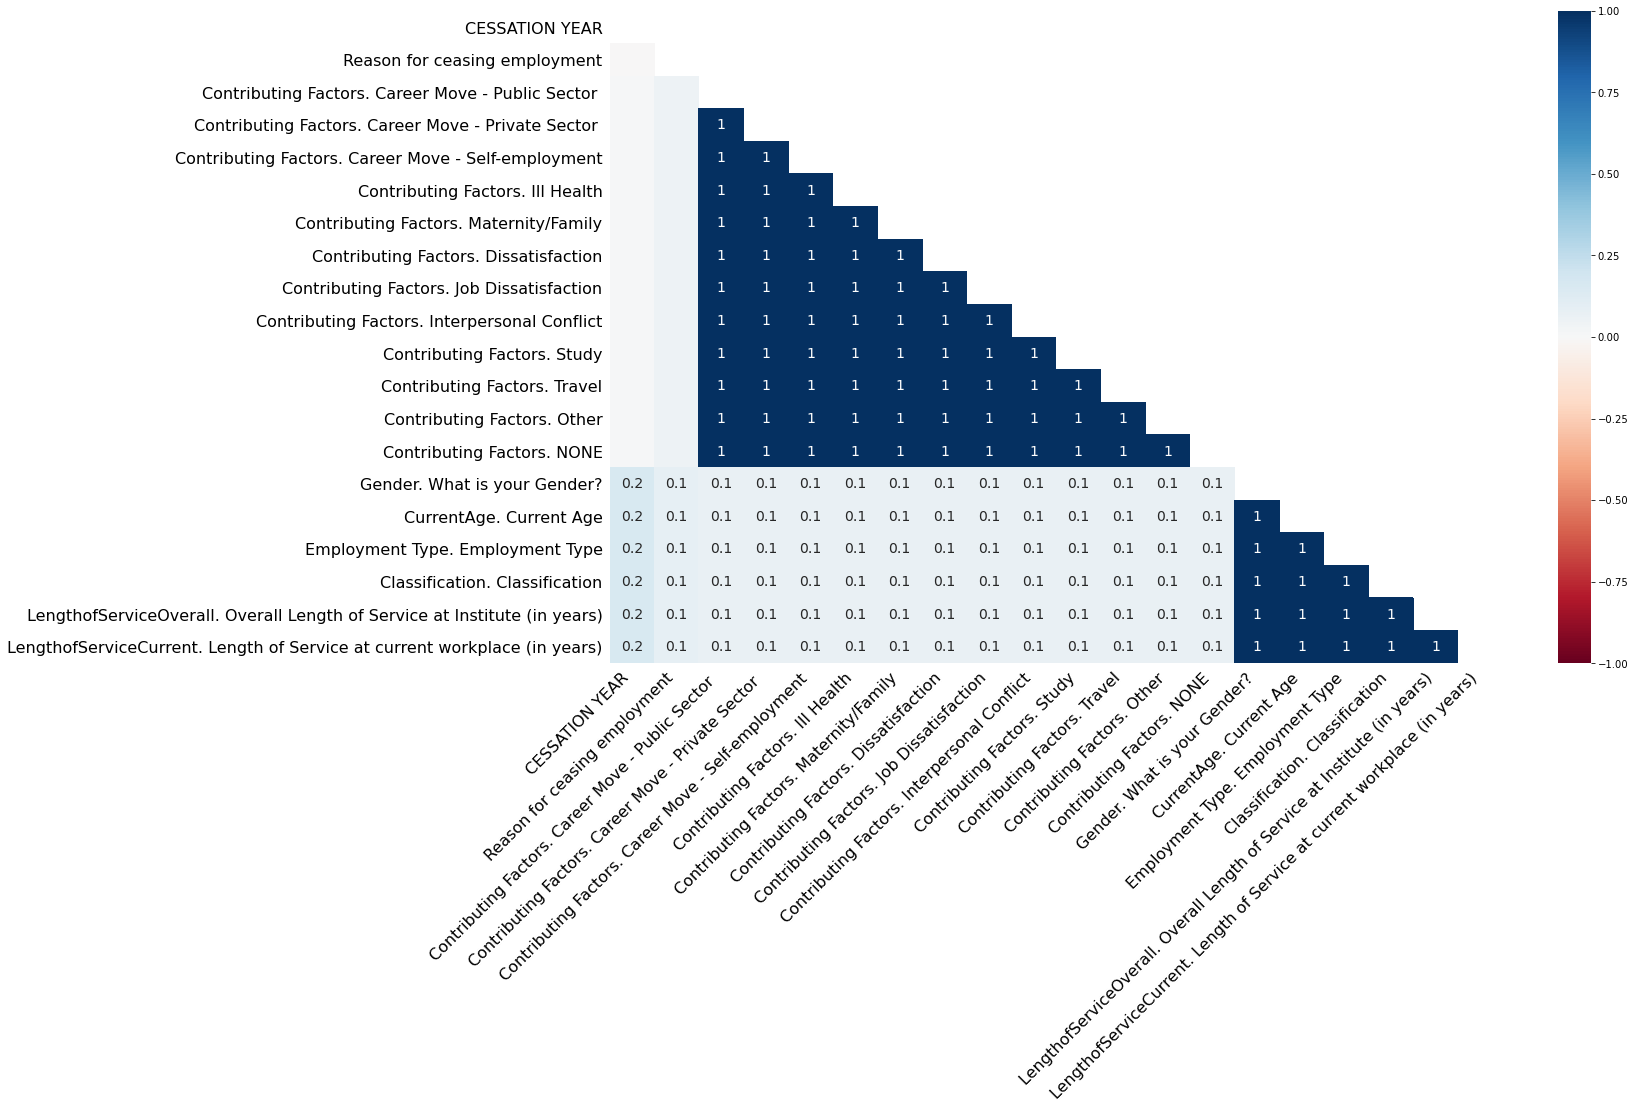

In [29]:
msno.heatmap(tafe_survey_updated)

Here we can see a better result with the heatmap. The contributing factor are highly correlated, so is extremely suspicious, maybe the answer was generated before hand.

## 4. Changing column names

Now that we have the missing values out of the equation, we need to recognize which of the data is the same in both data sets.

First, we need to identify the data that we have in both data sets that are the same, here we have a summary of the data:


|   dete_survey   |                    tafe_survey                    |                        Definition                       |
|:---------------:|:-------------------------------------------------:|:-------------------------------------------------------:|
|        ID       |                     Record ID                     |   An id used to identify the participant of the survey  |
|  SeparationType |            Reason for ceasing employment          |   The reason why the participant's   employment ended   |
|    Cease Date   |                   CESSATION YEAR                  |   The year or month the participant's employment ended  |
| DETE Start Date |                                                   | The year the participant began employment with the DETE |
|                 |              LengthofServiceOverall.              |     The length of the person's employment (in years)    |
|                 | Overall Length of Service at Institute (in Years) |                                                         |
|       Age       |                    CurrentAge.                    |                The age of the participant               |
|                 |                    Current Age                    |                                                         |
|      Gender     |                      Gender.                      |              The gender of the participant              |
|                 |                What is your Gender?               |                                                         |

Now that we have clear which columns we need to remove spaces and unify the case of the column names.

In [30]:
# We are using replace to change characters or spaces, strip to remove spaces at the beginning or the end
# and lower to change the case of the columns names.
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ','_').str.strip().str.lower()
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [31]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [32]:
# Now we change the names of the columns in the TAFE survey that coincide with the DETE survey data.
columns_names = {
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}

tafe_survey_updated = tafe_survey_updated.rename(columns = columns_names)

tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


## 5. Separation types: visualizing the values

Following our main goal, we need to know what of the employees leave the job because of a dissatisfaction with their job.

We need to choose only the persons that resigned to their job.

For this we are going to use the extremely useful `str.contains`to only choose the resignations cases.

In [33]:
# Value counts in the DETE survey, we have three kinds of resignation.
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [34]:
# Value counts in TAFE survey. 
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

### 5.1. Selecting only "Resignation" cases 

Now that we identified the names in the data, we use the `str.contains` to isolate only this cases, and we are going to create two copies of the dataset only with this data.

In [35]:
#In order to use str.contains with to put as FALSE the regex option, 
#the case sensitive, and the fill value for missing values.
dete_survey_updated = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation', regex=False, case=False, na=False)]
dete_resignations = dete_survey_updated.copy()
#Verify that you made the correct choise.
dete_resignations['separationtype'].value_counts(dropna=False)

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [36]:
tafe_survey_updated = tafe_survey_updated[tafe_survey_updated['separationtype'].str.contains('Resignation', regex=False, case=False, na=False)]
tafe_resignations = tafe_survey_updated.copy()
tafe_resignations['separationtype'].value_counts(dropna=False)

Resignation    340
Name: separationtype, dtype: int64

## 6. Date data: cleaning outliers

In this part our purpose is:

* Unify the date format to only year of resignation.
* Verify if we have outliers in the data.
* Remove the outliers

### 6.1. Dete Resignations outliers

First, we need to see the values that we have of resignations dates:

In [37]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
09/2010      1
2010         1
07/2006      1
07/2012      1
Name: cease_date, dtype: int64

Now, we are going to remove the months and the characters so we obtain only the year.

In [38]:
# str.split help us to divide the string and select only the last word.
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
# We are going to convert the string in float
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float")
# sort_index to visualize the values in order of years, not the frequency.
dete_resignations['cease_date'].value_counts().sort_index(ascending=True)

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [39]:
#Now we visualize the starts year.
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

`seaborn` will help us to visualize the data and identify quickly where we have an outlier, and if it is necessary to remove it.

Text(0.5, 0, 'End Year')

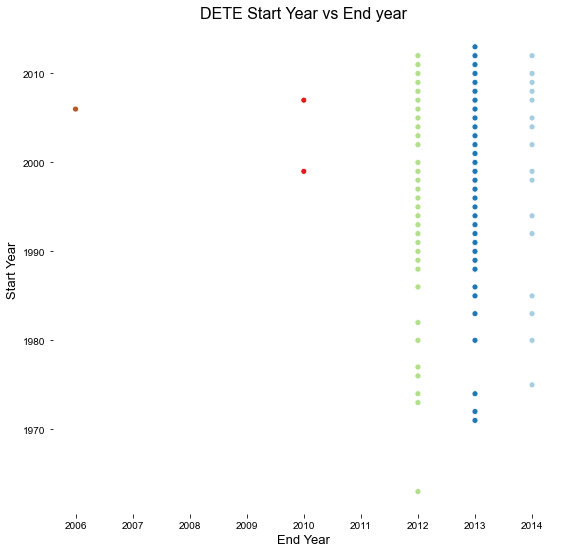

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(9, 9))
sns.despine(f, left=True, bottom=True)
sns.set_style("whitegrid")
sns.scatterplot(x=dete_resignations['cease_date'], y=dete_resignations['dete_start_date'], hue=dete_resignations['cease_date'],
                palette = 'Paired_r', legend=False)
plt.title("DETE Start Year vs End year", fontsize=16)
plt.ylabel("Start Year", fontsize=13)
plt.xlabel("End Year", fontsize=13)

* As we can see, the most old start date is in 1963, and the person stay in the job until 2012. Practically is not a resignation but a retirement.

* We have a case that started in 2006 and resign in 2006.

* Most of the resignations occurred in 2012, 2013 and 2014. 

* Is not clear why before 2011 we have low resignations.

### 6.2. TAFE Resignations outliers

The TAFE resignation survey already have the dates in year format, we don't have outliers, boring.

In [41]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

## 7. Identifying Dissatisfied Employees

In this part we are going to prepare the data so we can combine finally the data sets:

1. We are going to create a **"institute_service"** column in the DETE survey.
2. Next, we create a **"dissatisfied"** column in both surveys.  

### 7.1. Creating a service years column in DETE survey 

We need to calculate the service years for the DETE survey data set:

* We need to subtract the *'dete_start_date'* column to the *'cease_date'* column and assign it to the *'institute_service'* column.

In [42]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations[['dete_start_date', 'cease_date','institute_service']].head()

,dete_start_date,cease_date,institute_service
3,2005.0,2012.0,7.0
5,1994.0,2012.0,18.0
8,2009.0,2012.0,3.0
9,1997.0,2012.0,15.0
11,2009.0,2012.0,3.0


In [43]:
# Looking the values in institute_service column on tafe survey
tafe_resignations[['cease_date','institute_service']].head()

,cease_date,institute_service
3,2010.0,NaN
4,2010.0,3-4
5,2010.0,7-10
6,2010.0,3-4
7,2010.0,3-4


### 7.2. Creating a "dissatisfied" column in TAFE survey

To create a **"dissatisfied"** column in TAFE Survey we need to:

* Select the two columns that indicate the dissatisfaction.
* Identify the unique values in each column
* Create a function that convert the values on True or False, where True is that there is an indication of dissatisfaction
* Use `applymap` Method to both columns so we can apply the function to both data set at time and pass the info to the new 'dissatisfied' column. 

In [44]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [45]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [46]:
def update_vals(val):
    # first, leave alone the null data
    if pd.isnull(val):
        return np.nan
    # if there is not answer convert the value in False, else put True
    elif val == '-':
        return False
    else:
        return True
    
# Applymap help us to apply the function to both columns, the result is assigned to the new 'Dissatisfied' column.
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

### 7.3. Creating a "dissatisfied" column in DETE survey

For the Dete column we are going to use the `any` dataframe, according to Pandas [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html):

> Returns False unless there at least one element within a series or along a Dataframe axis that is True or equivalent (e.g. non-zero or non-empty).

We are going to look in several columns at once if ANY of them have a non null value, if that is True we return the True to the 'Dissatisfied' column.

In [47]:
dete_resignations['job_dissatisfaction'].value_counts(dropna=False)

False    270
True      41
Name: job_dissatisfaction, dtype: int64

In [48]:
#In the any dataframe we are going to put skipna as False, so we can take the null value as True
#The axis = 1 indicates that we want to work with columns.
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
    'dissatisfaction_with_the_department',
    'physical_work_environment',
    'lack_of_recognition',
    'lack_of_job_security',
    'work_location',
    'employment_conditions',
    'work_life_balance',
    'workload']].any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

## 8. Combine the Data

At this part we are going (at least) to combine the datasets. For this purpose we are going to use the `concat` method .

In [49]:
# We are going to creat a new column that help us differentiate later from whch dataset comes the data.
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'
# With the concat we set ignore index to True, so do not use the index values along the concatenation axis.
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index = True)

Let's look the missing values of the combined data set using`missingno`.

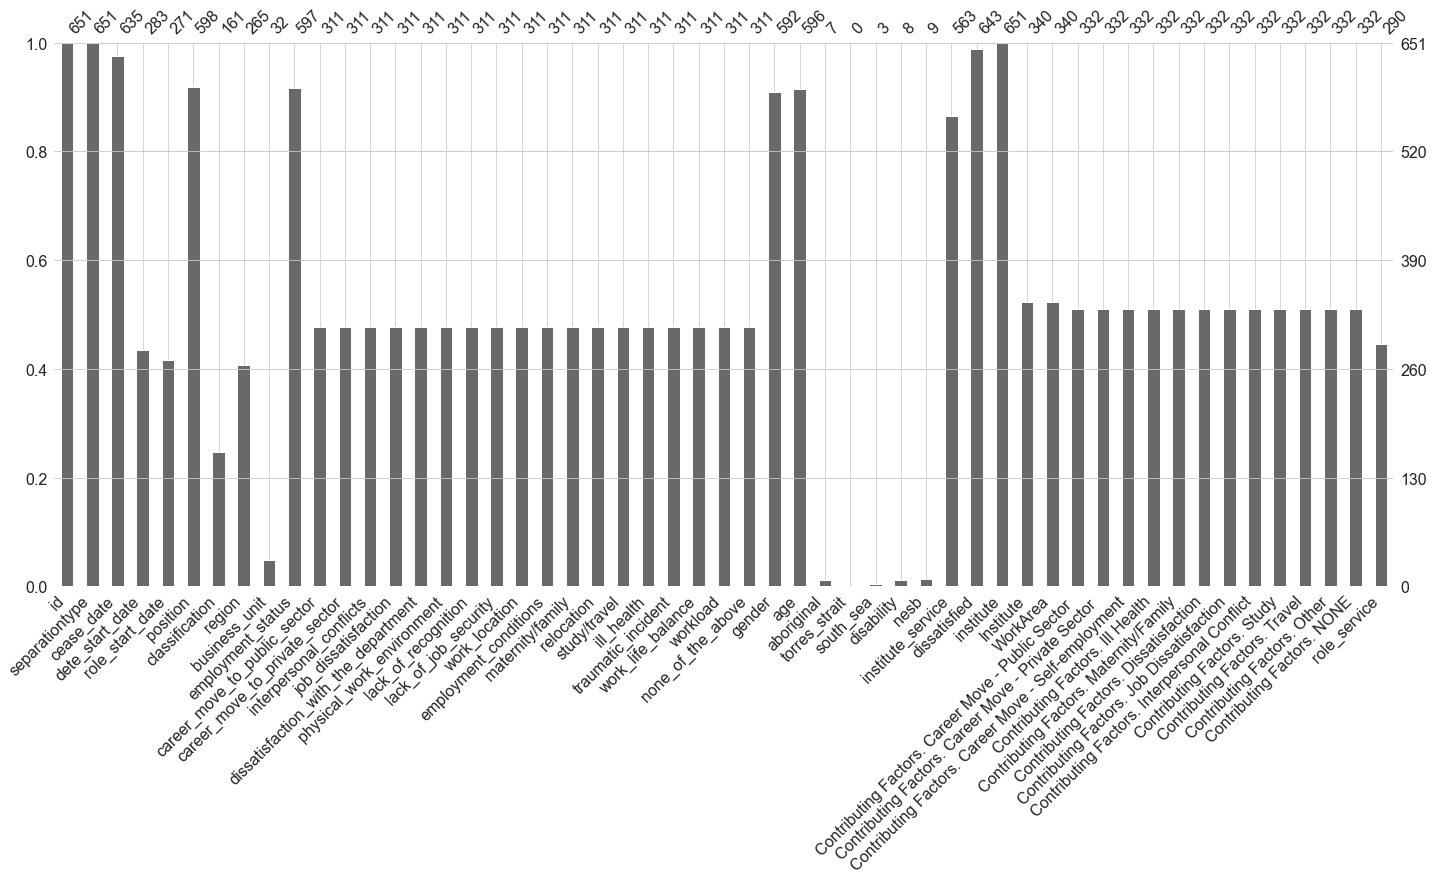

In [50]:
msno.bar(combined, labels=True)

We need at this stage only to work with the columns with less missing data, so we are going to use the `dropna` and set a threshold of 500 missing values.

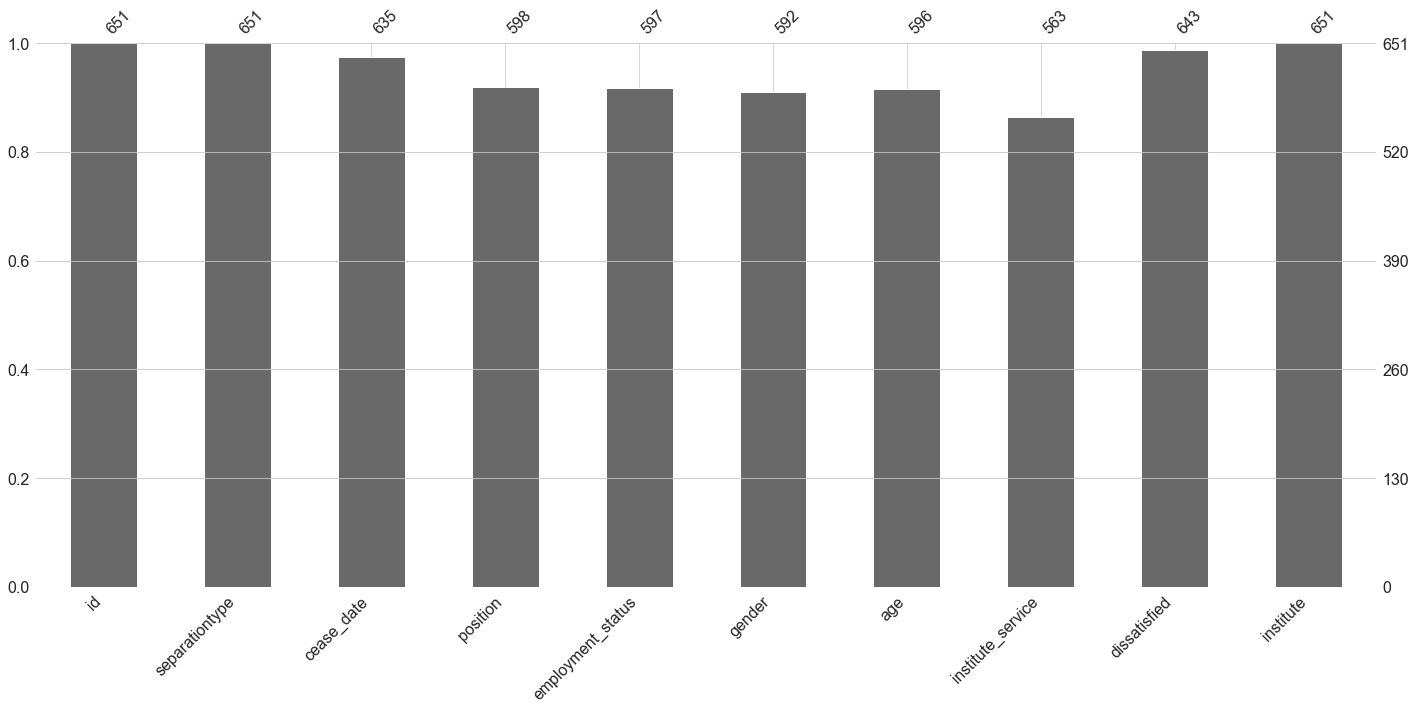

In [51]:
# Settin dropna thresh to 500 missing values
combined_updated = combined.dropna(thresh=500, axis=1)
msno.bar(combined_updated)

## 9. Cleaning service column

As we see previously the **institute_service** column have different values in the datasets, so we are going to clean the dataset to obtain the same values in the columns.

1. We are going to count values in the dataset.
2. Convert the data to string and then extract only the first digits of the string.
3. Return the values to float.

In [52]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
21.0                   3
39.0                   3
30.0                   2
25.0                   2
26.0                   2
28.0                   2
36.0                   2


In [53]:
# I create a new dataset copy to avoid the warnings.
combined_updated_a = combined_updated.copy()
# We are going to use the extract method to obtain only the digts from the string
combined_updated_a['institute_service_up'] = combined_updated_a['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated_a['institute_service_up'] = combined_updated_a['institute_service_up'].astype('float')
combined_updated_a['institute_service_up'].value_counts(dropna=False)

1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
22.0      6
10.0      6
17.0      6
14.0      6
12.0      6
16.0      5
18.0      5
24.0      4
23.0      4
21.0      3
39.0      3
32.0      3
19.0      3
36.0      2
30.0      2
25.0      2
26.0      2
28.0      2
42.0      1
29.0      1
35.0      1
27.0      1
41.0      1
49.0      1
38.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

Now that we cleaned the data we are going to group the data in 4 sets, and create a new column that help us to assign the names to a new column.

+ New: Less than 3 years at a company
+ Experienced: 3-6 years at a company
+ Established: 7-10 years at a company
+ Veteran: 11 or more years at a company

In [54]:
# first, we create a service function that help us to assign the name to the service years and group the results.
def service(x):
    if pd.isnull(x):
        return np.nan
    elif x < 3:
        return "New"
    elif x >= 3 and x < 7:
        return "Experienced"
    elif x >= 7 and x < 10.0:
        return "Established"
    else:
        return "Veteran"

#Now, we use apply method to execute the function, so we can assign the value to a new column    
combined_updated_a['service_cat'] = combined_updated_a['institute_service_up'].apply(service)
combined_updated_a['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        142
NaN             88
Established     56
Name: service_cat, dtype: int64

## 10. Perform initial analysis 

Now we have cleaned the data to do some analysis, so we are going to do two simple works:

1. Identify if the dissatisfaction have something to do with the time of service.
2. Explore if the position also influence the dissatisfaction.

### 10.1. Dissatisfied vs service_cat analysis

We want to know if there is a difference in dissatisfaction levels related to the years of service of the resigned personal.

To do this follow this steps:

1. Verify the total values of dissatisfied personal
2. Convert the null values to the most popular option, in this case False.
3. Use `pivot_table` to create a table that use as index 'service_cat' and as values 'dissatisfied'.
4. Convert the table with `style.background`, so we can visualize better.
5. Use a `barplot` to visualize the results.

In [55]:
combined_updated_a['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [56]:
#Fill the null values with False 
combined_updated_a['dissatisfied'] = combined_updated_a['dissatisfied'].fillna(False)
#Create the pivot table
dis_pct = combined_updated_a.pivot_table(index='service_cat', values='dissatisfied')
# Select the color background, we are using a matplot library color map so we use as_cmap=True
cm = sns.light_palette("#2ecc71", as_cmap=True)
# IMPORTANT: reset the index to work with seaborn, because seaborn is not friendly with many column names
dis_pct.reset_index(inplace=True)
# Set the color style with background_gradient using the saved cm color palette in cmap
dis_pct.style.background_gradient(cmap=cm)

,service_cat,dissatisfied
0,Established,0.553571
1,Experienced,0.343023
2,New,0.295337
3,Veteran,0.471831


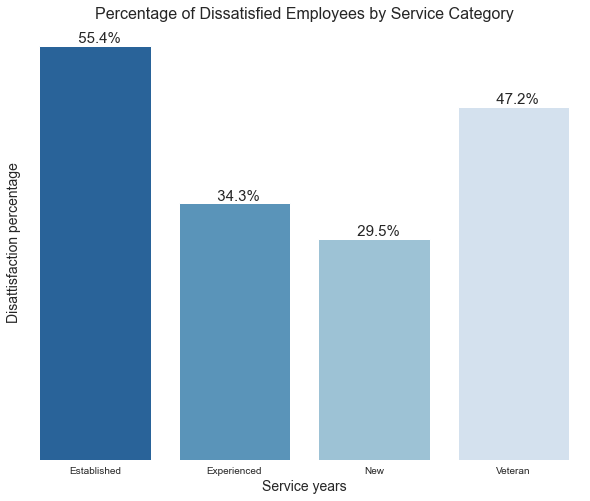

In [57]:
# Set the size of the plot
plt.figure(figsize=(10, 8))
# Set the style to white so you have a clean background in the plot
sns.set_style("white")
# Don't forget to reset the index, preferible if you do the reset in a previous input
g = sns.barplot(x="service_cat", y="dissatisfied", data=dis_pct, palette="Blues_r")
for p in g.patches:
    # Put the percentage and multiply by 100.
    g.annotate("{:" ">6.1f}%".format(p.get_height()*100), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   # Set center to see the results above the bar in the center
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, 7), 
                   textcoords = 'offset points')

# You don't need a plot box, if you want it erase this option
plt.box(on=None)
plt.title("Percentage of Dissatisfied Employees by Service Category", fontsize=16)
plt.ylabel("Disattisfaction percentage", size=14)
plt.xlabel("Service years", size=14)
#The Y ticks doesn't help.
plt.yticks([])
plt.show()

We have the following results:

* **55.4%** of the established that resigned reported dissatisfaction with their jobs.
* Only a **29.5%** of the new personal reported a dissatisfaction with their jobs.
* Veteran personal also reported a dissatisfaction.

It is likely that a new administration want to remove the old personal and gave to the new personal more attentions. But it is only a maybe, we need more data to have a conclusion.

### 10.2. Dissatisfied vs position

According with Marco van der Leij, you are more likely to "catch" the behavior of the people with whom you spend [more time](https://science.sciencemag.org/content/334/6060/1220).

So, it is possible that the age of the people have some influence on the dissatisfaction levels, but according to the quoted research is more probable to find more dissatisfaction between people that share more time together, and this occur in the people that share the same position.

We are going to explore if we can see this in our dataset.

1. Explore the null values of the 'position' column.
2. Use the `fillna` to change the null values to "N/A". The goal of our exercise don't require precision.
3. Create a `pivot_table`, but in this case we want to set the `aggfunc`as `np.sum` to see the totals ( you can enhance this part, but I don't have more time, seriously in excel you can do this quickly, please don't hate me) 
3. Create a `barplot` with `seaborn` to display the results. 

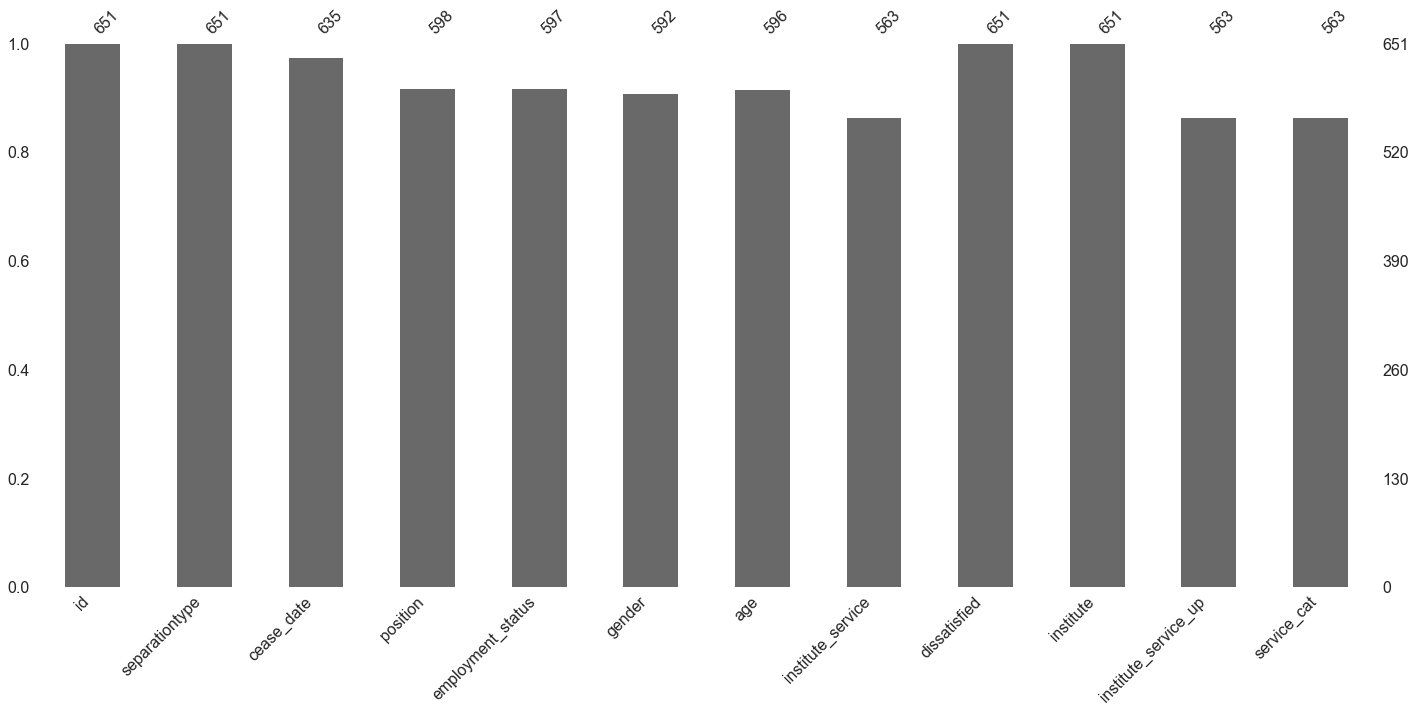

In [58]:
msno.bar(combined_updated_a)

In [59]:
combined_updated_a['position'].value_counts(dropna=False)

Administration (AO)                                        148
Teacher                                                    129
Teacher (including LVT)                                     95
Teacher Aide                                                63
NaN                                                         53
Cleaner                                                     39
Public Servant                                              30
Professional Officer (PO)                                   16
Operational (OO)                                            13
Head of Curriculum/Head of Special Education                10
Technical Officer                                            8
School Administrative Staff                                  8
Schools Officer                                              7
Workplace Training Officer                                   6
School Based Professional Staff (Therapist, nurse, etc)      5
Technical Officer (TO)                                 

In [60]:
combined_updated_a['position'] = combined_updated_a['position'].fillna(value="N/A")
combined_updated_a['position'].value_counts()

Administration (AO)                                        148
Teacher                                                    129
Teacher (including LVT)                                     95
Teacher Aide                                                63
N/A                                                         53
Cleaner                                                     39
Public Servant                                              30
Professional Officer (PO)                                   16
Operational (OO)                                            13
Head of Curriculum/Head of Special Education                10
Technical Officer                                            8
School Administrative Staff                                  8
Schools Officer                                              7
Workplace Training Officer                                   6
School Based Professional Staff (Therapist, nurse, etc)      5
Technical Officer (TO)                                 

In [61]:
# Set the aggfunc as np.sum, and use two indexes, also to check if the service year have some influence.
dis_pct_a = combined_updated_a.pivot_table(index=['position', 'service_cat'], values='dissatisfied', aggfunc=[np.sum])
cm = sns.light_palette("#2ecc71", as_cmap=True)
# Don't f*ck*ng forget to reset the index again, seaborn hates to work with the pivot table columns
dis_pct_a.reset_index(inplace=True)
# Set the name of the columns of the dataset
dis_pct_a.columns=['position','service_cat','dissatisfied']
dis_pct_a.style.background_gradient(cmap=cm)

,position,service_cat,dissatisfied
0,Administration (AO),Established,3.000000
1,Administration (AO),Experienced,14.000000
2,Administration (AO),New,14.000000
3,Administration (AO),Veteran,1.000000
4,Business Service Manager,Veteran,0.000000
5,Cleaner,Established,4.000000
6,Cleaner,Experienced,5.000000
7,Cleaner,New,4.000000
8,Cleaner,Veteran,4.000000
9,Executive (SES/SO),Experienced,1.000000


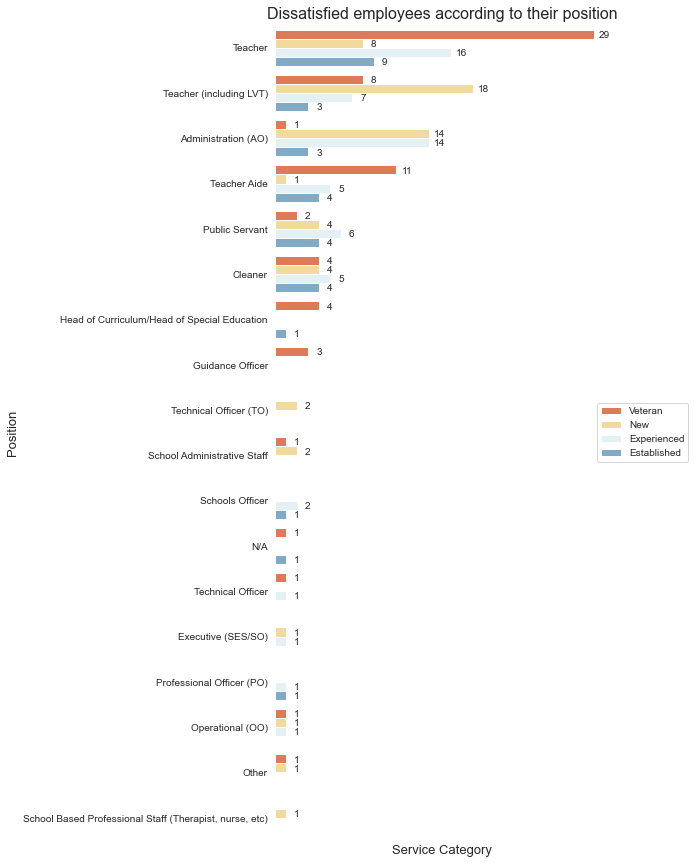

In [62]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the pivot table dataset
g1 = dis_pct_a[dis_pct_a['dissatisfied'] > 0].sort_values("dissatisfied", ascending=False)

# Plot the pivot table
g_a = sns.barplot(x="dissatisfied", y="position", hue="service_cat", data=g1, palette="RdYlBu")
    
# We need to change the position of the names of the columns.
for r in ax.patches:
    if r.get_width() >= 0:
        #In this case we use the width to set the number in the bar
        width = r.get_width()
        # You can play with the numbers below and see what happen...
        plt.text(1+r.get_width(), r.get_y()+0.6*r.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')
    else:
        r.get_width() == 0
   

plt.box(on=None)
plt.xlabel("Service Category", fontsize=13)
plt.ylabel("Position", fontsize=13)
plt.xticks([])
plt.title("Dissatisfied employees according to their position", fontsize=16)
#IMPORTANT: Here you need the box plot, fix it at the center right of the barplot, or the up, as you wish.
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()

Bingo?

I don't know, but is clear that the results are:

* Teachers are the most dissatisfied professional. And (as expected) the dissatisfaction is present independent of the years service.
* But (and a big BUT), if most of the employees are teachers obviously you will find more dissatisfaction in this group.
* Anyway, is likely that between teachers the situations that produce dissatisfaction are the same, and the dissatisfaction spread like a disease.

We need more information to have more conclusions, but at this moment is all that we have, and this take a lot of time, and a I need to do more projects, sorry my friends.

## Conclusions

We have the following results:

* **55.4%** of the established that resigned reported dissatisfaction with their jobs.
* Only a **29.5%** of the new personal reported a dissatisfaction with their jobs.
* Veteran personal also reported a dissatisfaction.

It is likely that a new administration want to remove the old personal and gave to the new personal more attentions. But it is only a maybe, we need more data to have a clear conclusion.

Regarding the position and the dissatisfaction:

* Teachers are the most dissatisfied professional. And (as expected) the dissatisfaction is present independent of the years service.
* But (and a big BUT), if most of the employees are teachers obviously you will find more dissatisfaction in this group.
* Anyway, is likely that between teachers the situations that produce dissatisfaction are the same, and the dissatisfaction spread like a disease.
